# Adaline

In [1]:
from adaline import AdalineGD, AdalineSGD

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from utils import plot_decision_regions

## Getting the data ready

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[:, [0,2]].values

## Testing Adaline out

### Selecting the right learning rate

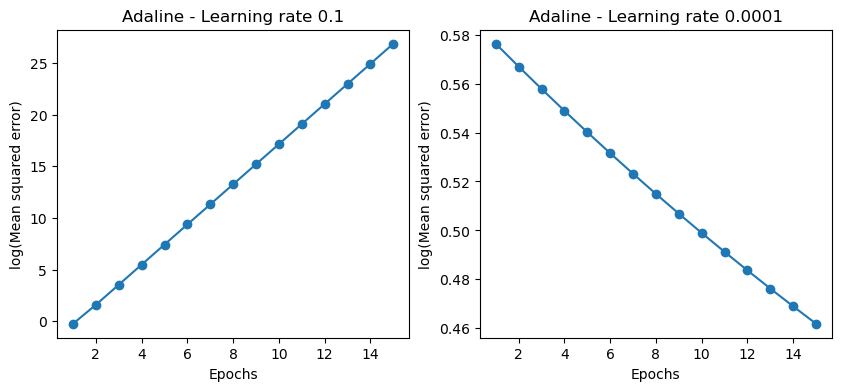

In [3]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

The above illustrates the need for the learning rate to be small enough so it doesn't overshoot the global minima.

### Improving gradient decent through `feature scaling`

In [4]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

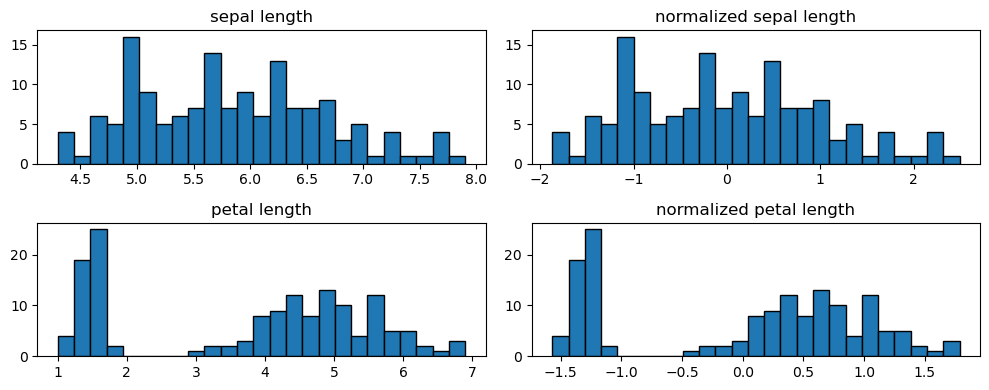

In [5]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
ax[0, 0].hist(X[:,0], bins=25, edgecolor='black')
ax[0, 0].set_title('sepal length')
ax[0, 1].hist(X_std[:,0], bins=25, edgecolor='black')
ax[0, 1].set_title('normalized sepal length')
ax[1, 0].hist(X[:,1], bins=25, edgecolor='black')
ax[1, 0].set_title('petal length')
ax[1, 1].hist(X_std[:,1], bins=25, edgecolor='black')
ax[1, 1].set_title('normalized petal length')
plt.tight_layout()
plt.show()

In [6]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

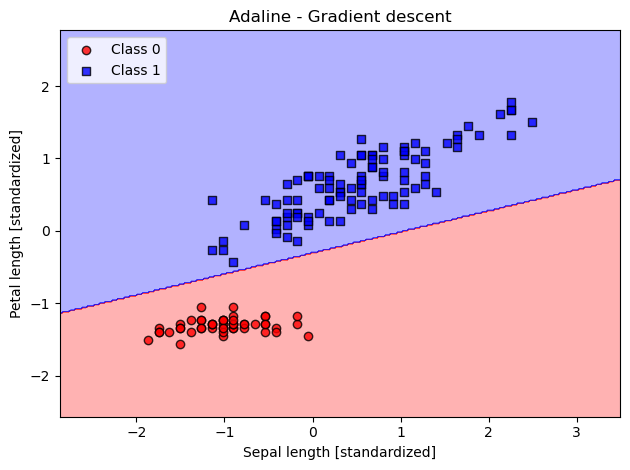

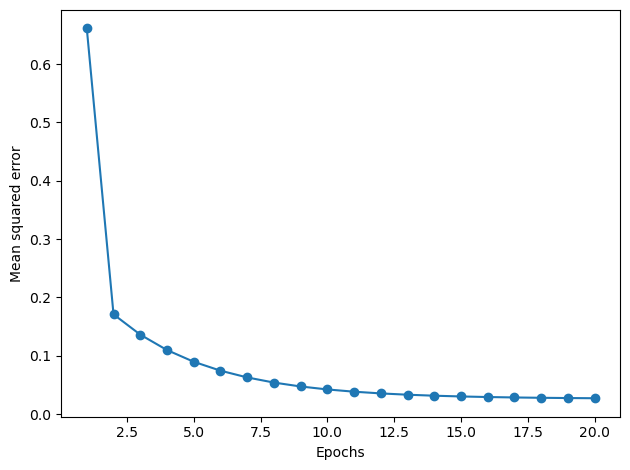

In [7]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

### Using `Stochastic Gradient descent` to support Large-scale ML

In [8]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

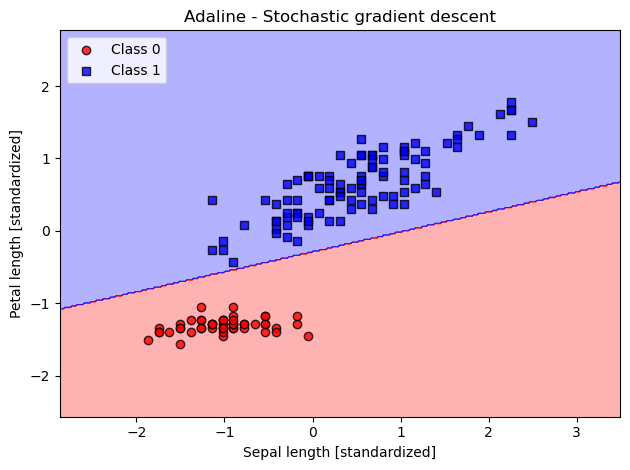

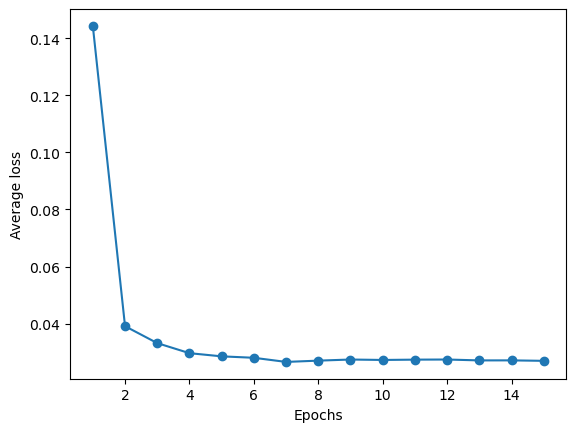

In [9]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.show()